In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
df_weather = pd.read_csv("weather.csv", index_col="年月日", parse_dates=True)

In [28]:
df_weather.head()

,平均気温(℃),降水量の合計(mm),日照時間(時間)
年月日,,,
2019-01-01,5.3,0.0,8.9
2019-01-02,6.2,0.0,8.7
2019-01-03,4.9,0.0,8.9
2019-01-04,5.1,0.0,8.9
2019-01-05,7.4,0.0,8.9


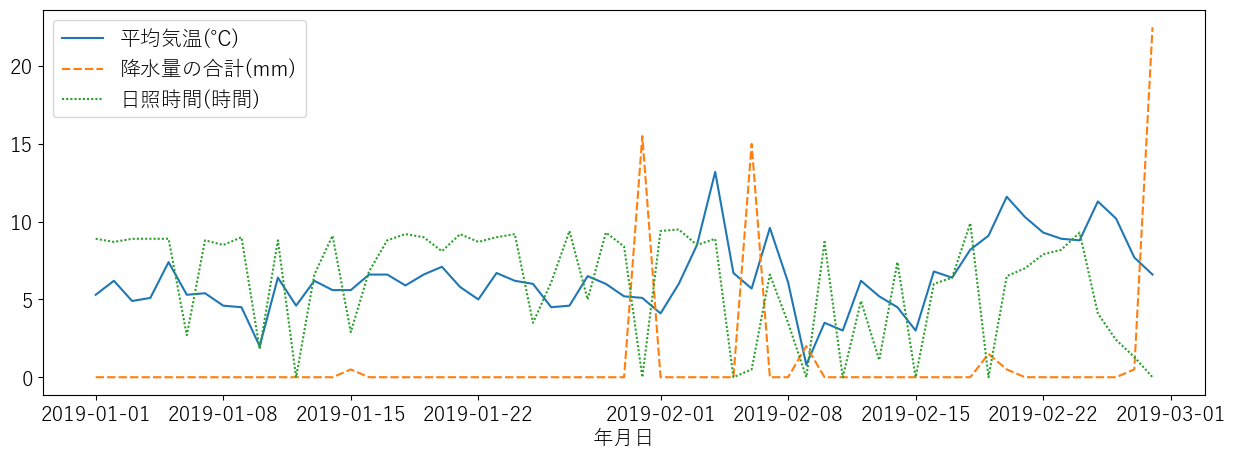

In [29]:
plt.rcParams["font.family"] = "Yu Gothic"
plt.rcParams["font.size"] = 15
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_weather)
plt.savefig("折れ線.png")

In [30]:
df_score = pd.read_csv("test_score.csv").sort_values("クラス")
df_score.head()

,名前,クラス,性別,国語,算数,英語,理科,社会
0,Aさん,1組,男性,89,65,85,70,88
22,Wさん,1組,男性,44,46,61,56,65
21,Vさん,1組,男性,65,58,62,50,53
18,Sさん,1組,女性,42,57,56,33,61
16,Qさん,1組,男性,45,56,30,73,49


<Axes: xlabel='名前', ylabel='社会'>

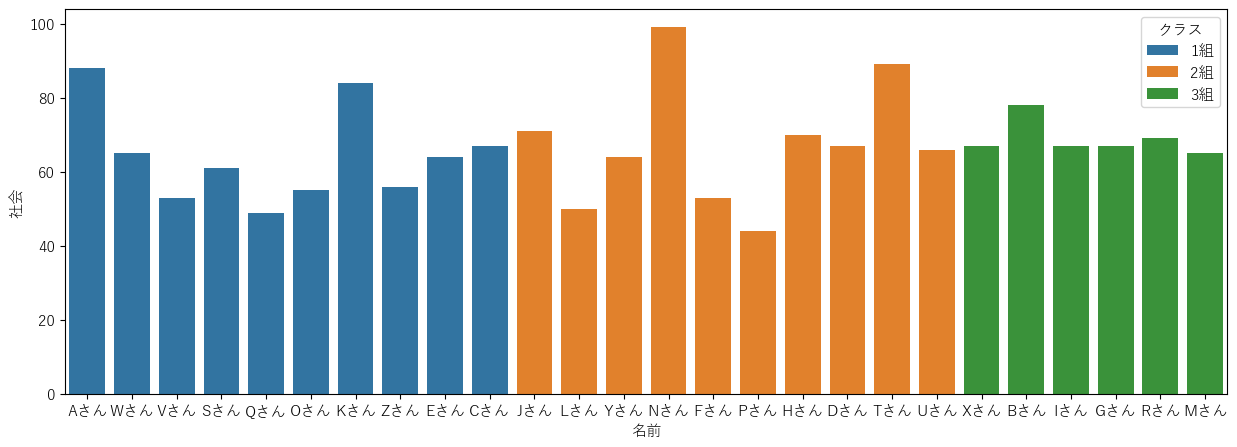

In [31]:
plt.rcParams["font.family"] = "Yu Gothic"
plt.rcParams["font.size"] = 11
plt.figure(figsize=(15, 5))
sns.barplot(data = df_score, x="名前", y="社会", 
            hue="クラス", hue_order=["1組","2組","3組"])

<Axes: xlabel='社会', ylabel='Count'>

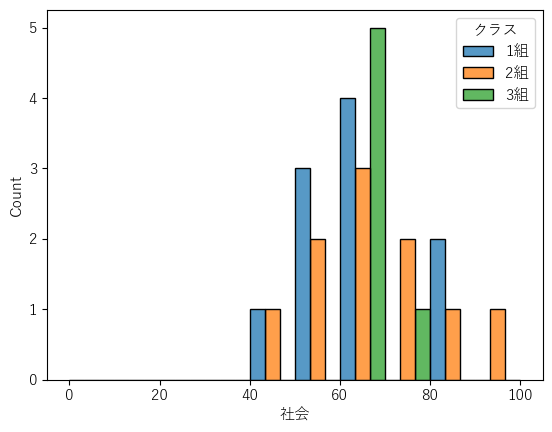

In [32]:
sns.histplot(data=df_score, 
             x="社会", binrange=(0, 100), bins = 10,
             hue="クラス", hue_order=["1組","2組","3組"], multiple="dodge")

<Axes: xlabel='国語', ylabel='算数'>

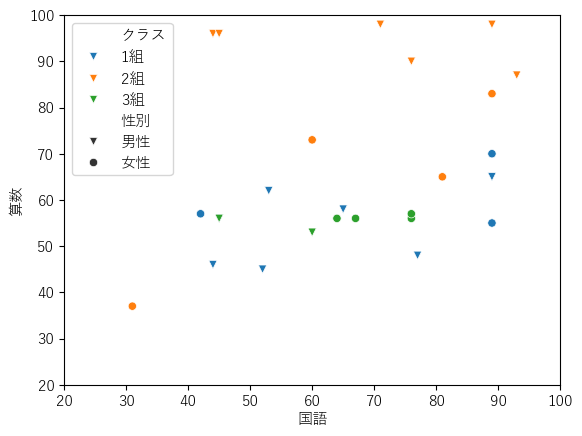

In [33]:
plt.xlim(20, 100)
plt.ylim(20, 100)
sns.scatterplot(data=df_score,
                x="国語", y="算数",
                hue="クラス", hue_order=["1組","2組","3組"],
                style="性別", markers={"男性":"v", "女性":"o"})

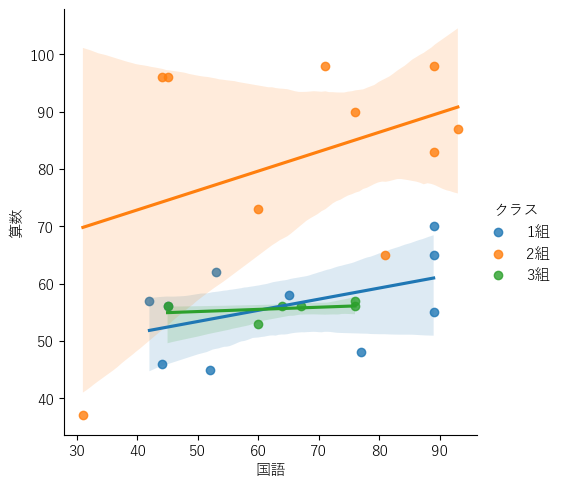

In [34]:

sns.lmplot(data=df_score,
                x="国語", y="算数",
                hue="クラス", hue_order=["1組","2組","3組"],
                )

<Axes: xlabel='国語', ylabel='算数'>

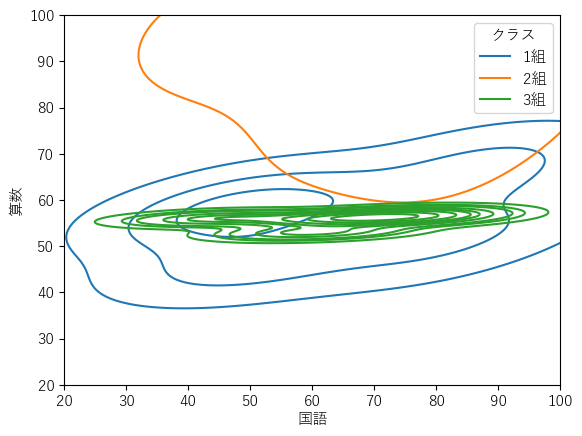

In [35]:
plt.xlim(20, 100)
plt.ylim(20, 100)
sns.kdeplot(data=df_score,
                x="国語", y="算数",
                hue="クラス", hue_order=["1組","2組","3組"],
                )

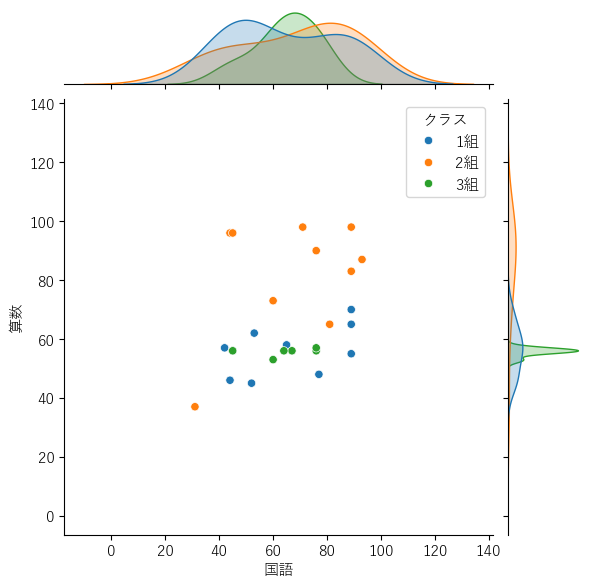

In [36]:
sns.jointplot(data=df_score,
                x="国語", y="算数",
                hue="クラス", hue_order=["1組","2組","3組"],
                )

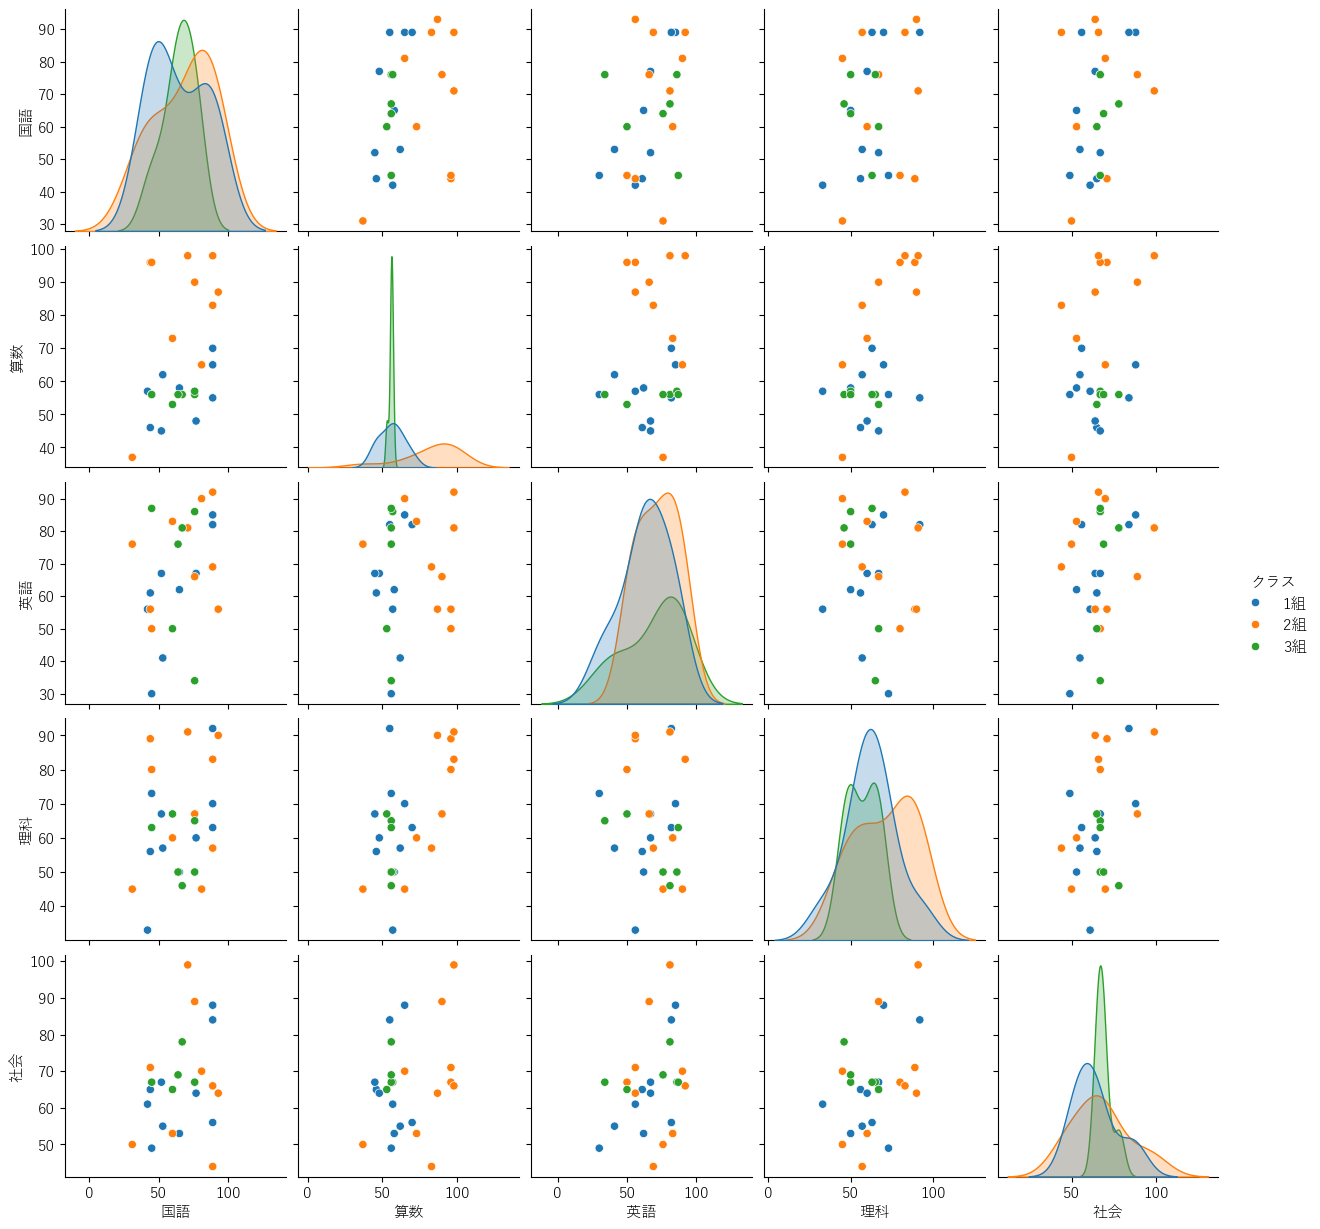

In [37]:
sns.pairplot(data=df_score, hue="クラス")

<Axes: >

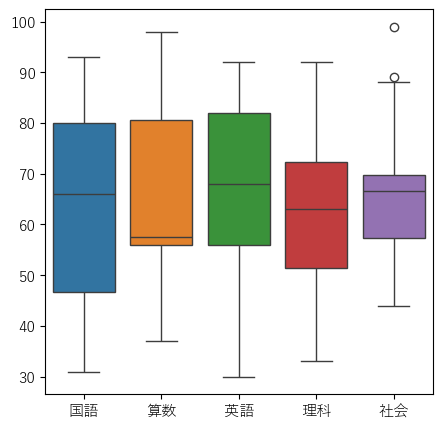

In [38]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df_score)

In [39]:
df_score2=df_score.melt(["名前","クラス","性別"], var_name="科目", value_name="点数")
df_score2

,名前,クラス,性別,科目,点数
0,Aさん,1組,男性,国語,89
1,Wさん,1組,男性,国語,44
2,Vさん,1組,男性,国語,65
3,Sさん,1組,女性,国語,42
4,Qさん,1組,男性,国語,45
...,...,...,...,...,...
125,Bさん,3組,女性,社会,78
126,Iさん,3組,女性,社会,67
127,Gさん,3組,男性,社会,67
128,Rさん,3組,女性,社会,69


<Axes: xlabel='科目', ylabel='点数'>

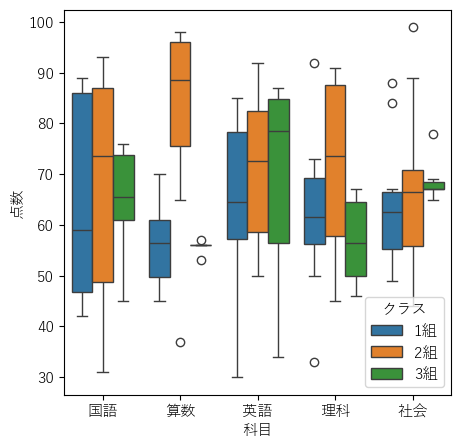

In [40]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df_score2,
            x="科目", y="点数",
            hue="クラス")

<Axes: xlabel='科目', ylabel='点数'>

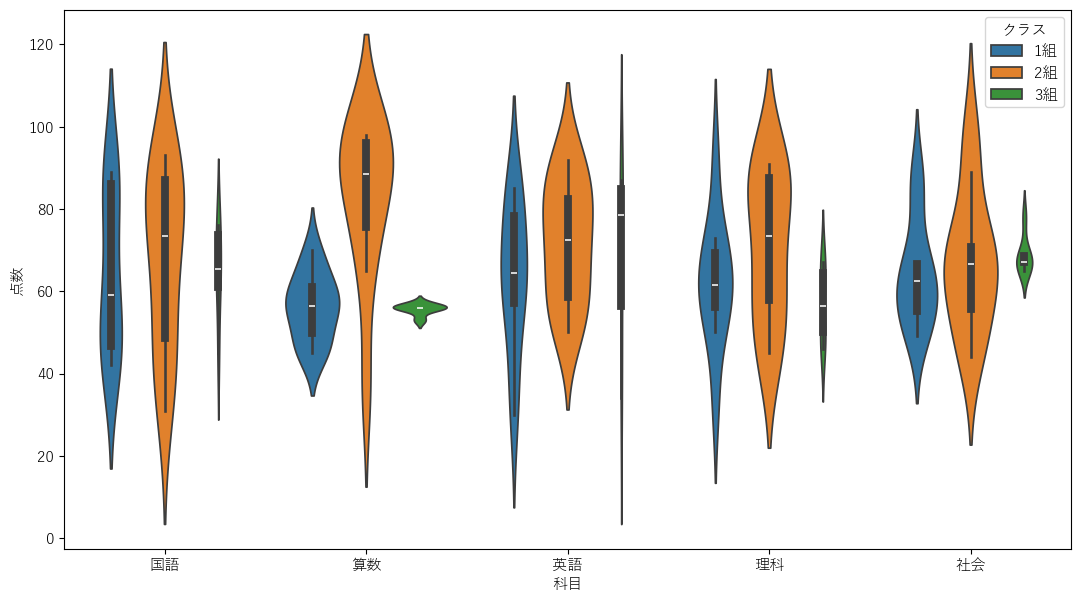

In [41]:
plt.figure(figsize=(13, 7))
sns.violinplot(data=df_score2,
            x="科目", y="点数",
            hue="クラス")

<Axes: xlabel='科目', ylabel='点数'>

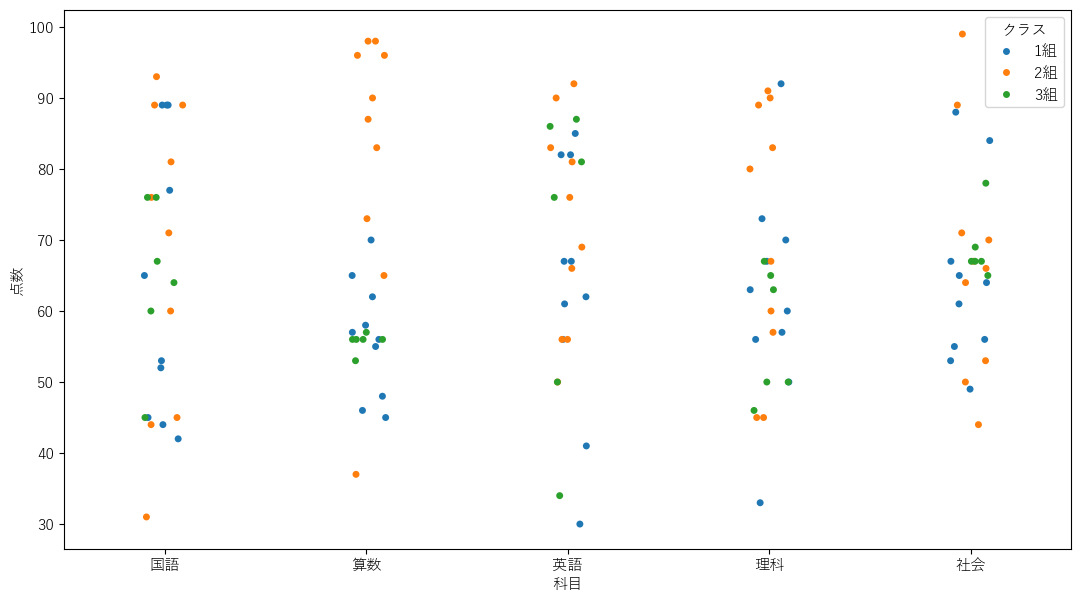

In [42]:
plt.figure(figsize=(13, 7))
sns.stripplot(data=df_score2,
            x="科目", y="点数",
            hue="クラス")

<Axes: xlabel='科目', ylabel='点数'>

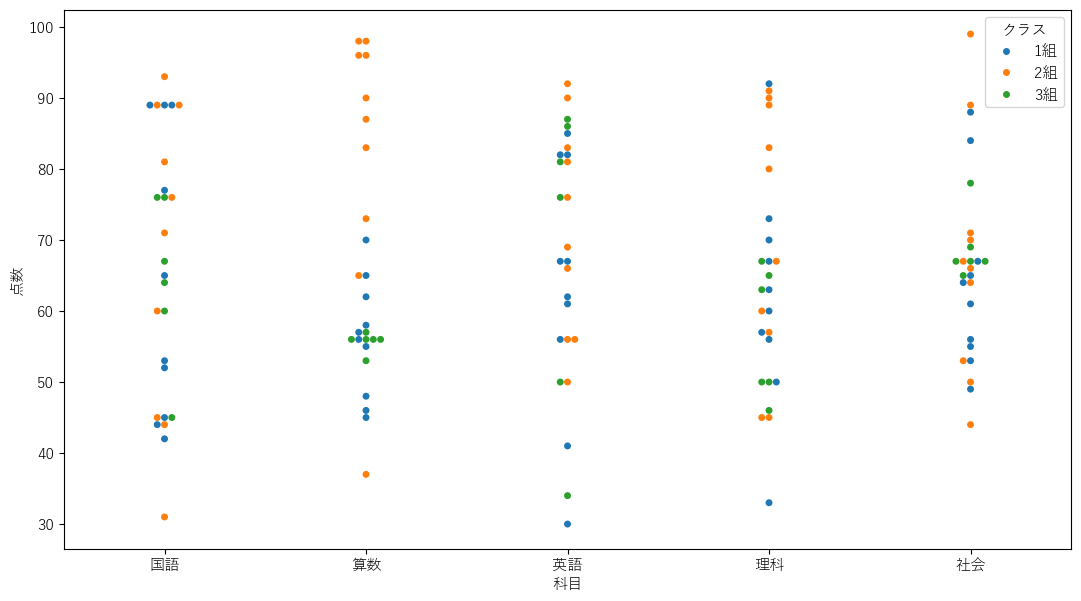

In [43]:
plt.figure(figsize=(13, 7))
sns.swarmplot(data=df_score2,
            x="科目", y="点数",
            hue="クラス")

In [44]:
numeric_df = df_score.select_dtypes(include='number')
numeric_df.corr()


,国語,算数,英語,理科,社会
国語,1.000000,0.321766,0.380822,0.277900,0.285734
算数,0.321766,1.000000,0.072144,0.597091,0.289163
英語,0.380822,0.072144,1.000000,-0.086247,0.325232
理科,0.277900,0.597091,-0.086247,1.000000,0.410186
社会,0.285734,0.289163,0.325232,0.410186,1.000000


<Axes: >

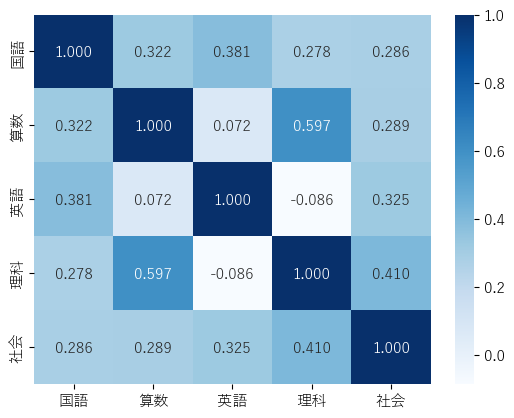

In [45]:
sns.heatmap(numeric_df.corr(),
            cmap="Blues",
            annot=True,
            fmt=".3f")

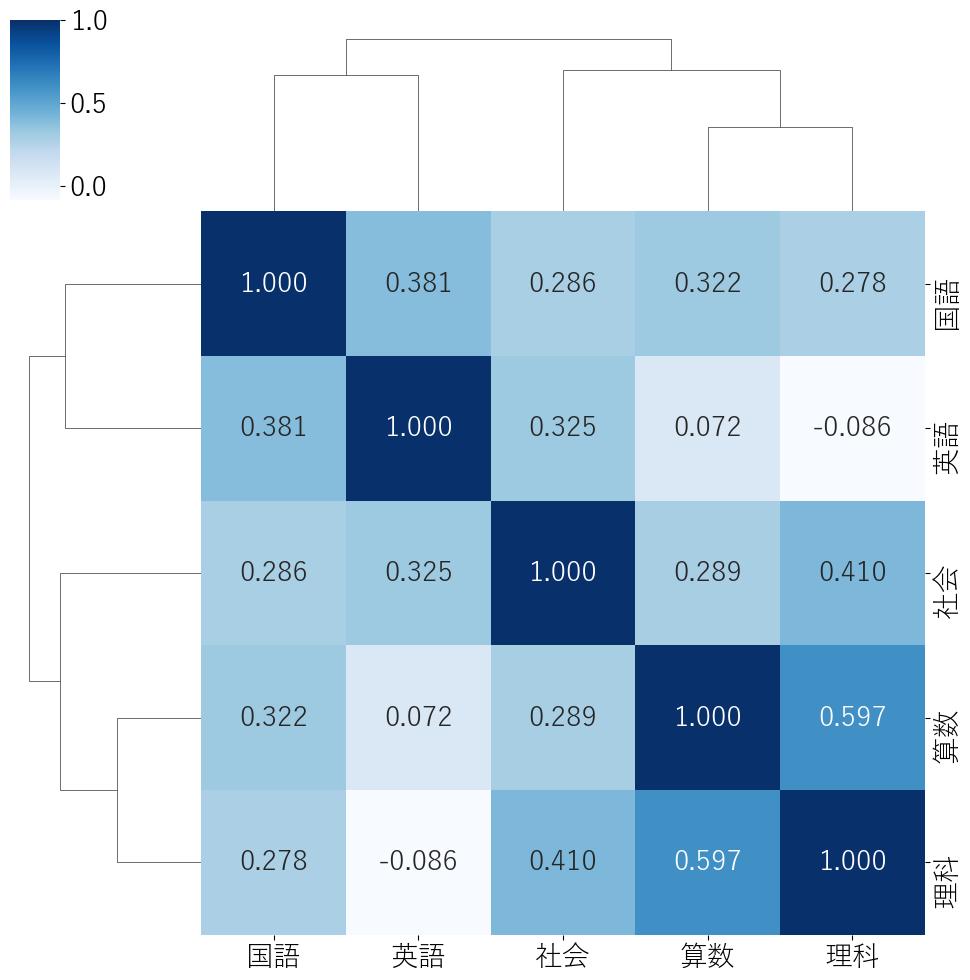

In [46]:
plt.rcParams["font.family"] = "Yu Gothic"
plt.rcParams["font.size"] = 20
sns.clustermap(numeric_df.corr(),
            cmap="Blues",
            annot=True,
            fmt=".3f")